<a href="https://colab.research.google.com/github/gwenostergren/20MA573/blob/master/src/Notes_W3_european_options_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract

- Create european call/put  class
- Analyse payoff structures of option combinations, such as writeen straddle and butterfly.

# Anal

Payoff of European call with 
strike $K$ and exercise price $S$ is given as
$$C(S, K)= (S - K)^+ = \max\{S- K, 0\}.$$
Similarly European put with 
strike $K$ and exercise price $S$ is given as
$$P(S, K)= (S - K)^- = \max\{-S+ K, 0\}.$$
Traders use different option combinations according to market analysis to meet their various objectives. Please find wiki for those combinations and their use.



# Code

First, we create call/put class

In [0]:
'''=========
option class init
=========='''
class VanillaOption:
    def __init__(
        self,
        otype = 1, # 1: 'call'
                  # -1: 'put'
        strike = 110.,
        maturity = 1.,
        market_price = 10.):
      self.otype = otype
      self.strike = strike
      self.maturity = maturity
      self.market_price = market_price #this will be used for calibration
      
    def explain_yourself(self):
        if self.otype == 1:
          print("I am a call.")
        if self.otype == -1:
          print("I am a put.")

    def payoff(self, s): #s: excercise price
      otype = self.otype
      k = self.strike
      maturity = self.maturity
      return max([0, (s - k)*otype])

In [23]:
#testing above code
option1 = VanillaOption(otype=-1,strike = 10., maturity = .5, market_price=11)

option1.explain_yourself()
option1.payoff(12)

#The difference between range and list
excercise_price_range = range(5, 15, 1)
print(excercise_price_range) #Only saves 5 and 15 in memory
list(excercise_price_range) #Saves every number between 5 and 15 in memory

# Range saves 2 numbers no matter how far apart they are
# List saves a lot and is more computationally intensive.

for s in excercise_price_range:
  print(option1.payoff(s))

I am a put.
range(5, 15)
5.0
4.0
3.0
2.0
1.0
0
0
0
0
0


__Test__

We will use a few examples to test the above class.

__ex__

plot payoff diagram of 40-strike call as a function of exercise price.

In [0]:
import matplotlib.pyplot as plt

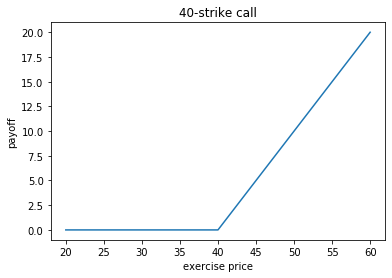

In [3]:

#create option instance, maturity is just arbitrarily given
opt1 = VanillaOption(otype = 1, strike = 40, maturity= 1.) 
stk_list = range(20, 61)
payoff_list = [opt1.payoff(s) for s in stk_list]
plt.plot(stk_list, payoff_list)

#decorations
plt.xlabel('exercise price')
plt.ylabel('payoff')
plt.title('40-strike call');
plt.show()